🚀Import `Seaborn` and `Pandas`

In [0]:
import numpy as np  #import numpy
import pandas as pd  #import pandas
import seaborn as sns

Let's see what datasets come with `Seaborn`

In [0]:
sns.get_dataset_names()

Let's see how iris in `Seaborn` differs from the one in `sklearn`

In [4]:
from sklearn import datasets
sklearn_iris = datasets.load_iris()
#df = pd.DataFrame(iris.data)

iris = sns.load_dataset("iris")  #https://github.com/mwaskom/seaborn-data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


✏ and plot using `scatterplot`, note that in matplotlib we used `scatter` 😁

[Text(0, 0.5, 'sepal width (cm)'),
 Text(0.5, 0, 'sepal length (cm)'),
 Text(0.5, 1.0, 'Iris sepal dimensions')]

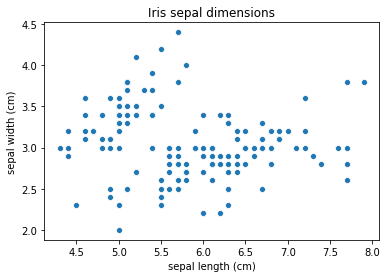

In [5]:
?sns.scatterplot

ax = sns.scatterplot(x='sepal_length', y='sepal_width', data=iris);
ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)', title='Iris sepal dimensions')

Bar chart of sample type counts

[Text(0.5, 1.0, 'Number of samples per species in iris dataset')]

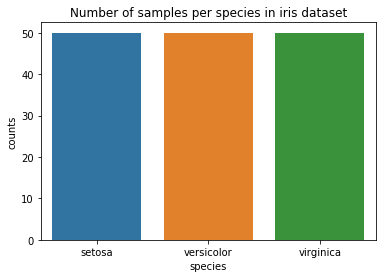

In [6]:
iris_counts = iris[['species']].groupby('species').size().reset_index(name='counts')

?sns.barplot
ax = sns.barplot(x='species', y='counts', data=iris_counts)
ax.set(title='Number of samples per species in iris dataset')

A better way to do this?

[Text(0.5, 1.0, 'Number of samples per species in iris dataset')]

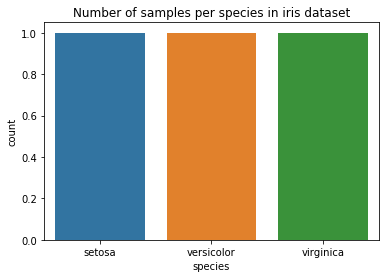

In [0]:
?sns.countplot
ax = sns.countplot(x='species', data=iris_counts)
ax.set(title='Number of samples per species in iris dataset')

# 🤔 Exercise 1: 

In a new Colab notebook, use `Seaborn` to create a scatterplot of the `iris` dataset showing `sepal lenght` vs. `sepal width` where the dots are colored by spieces. 

Can you find a way to deal with overplotting?

How is this different from the same plot made with `matplotlib`?

You will need to look at the help:

```
?sns.scatterplot
```

[Text(0, 0.5, 'sepal width (cm)'),
 Text(0.5, 0, 'sepal length (cm)'),
 Text(0.5, 1.0, 'Iris sepal dimensions')]

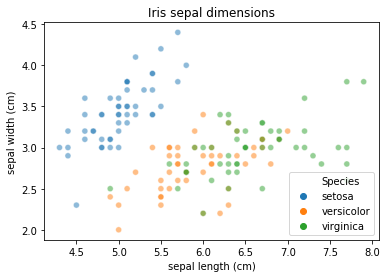

In [9]:
ax = sns.scatterplot(
  x='sepal_length',
  y='sepal_width',
  alpha=0.5,
  hue='species',
  data=iris);

l = ax.legend()  #ax.legend_
l.get_texts()[0].set_text('Species')  #ax.legend_.__dict__

ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)', title='Iris sepal dimensions')

# 🤔 Exercise 2: 

In a new Colab notebook, use `Seaborn` to create a scatterplot of the `iris` dataset showing `sepal lenght` vs. `sepal width` and where dots radius depends on `petal length`. 

Can you find a way to deal with overplotting?

How is this different from the same plot made with `matplotlib`?

You will need to look at the help:

```
?sns.scatterplot
```



[Text(0, 0.5, 'sepal width (cm)'),
 Text(0.5, 0, 'sepal length (cm)'),
 Text(0.5, 1.0, 'Iris sepal dimensions')]

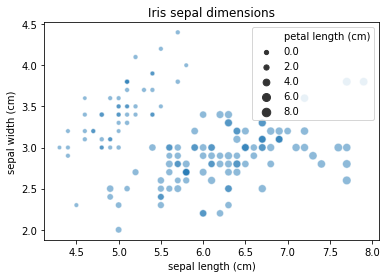

In [12]:
ax = sns.scatterplot(
  x='sepal_length',
  y='sepal_width',
  alpha=0.5,
  size='petal_length',
  data=iris);

l = ax.legend()  #ax.legend_
l.get_texts()[0].set_text('petal length (cm)')  #ax.legend_.__dict__

ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)', title='Iris sepal dimensions')

# 😖Exercise 3: 

In a new Colab notebook load `SMO-VOR-2015` and use `Seaborn` to create a scatterplot of  the altitudes over time.

Can you deal with overplotting?

You will need to change `ptime` to a datetime object:

```
df.ptime = pd.to_datetime(df.ptime)
```

, you can resize the figure with:

```
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
```

, to remove the dot's edge color you can use

```
edgecolor=None
```

, and to limit the xaxis

```
ax.set(xlim=(df.ptime.min(), df.ptime.max())
```

[(735658.6786805555, 735948.6662384259)]

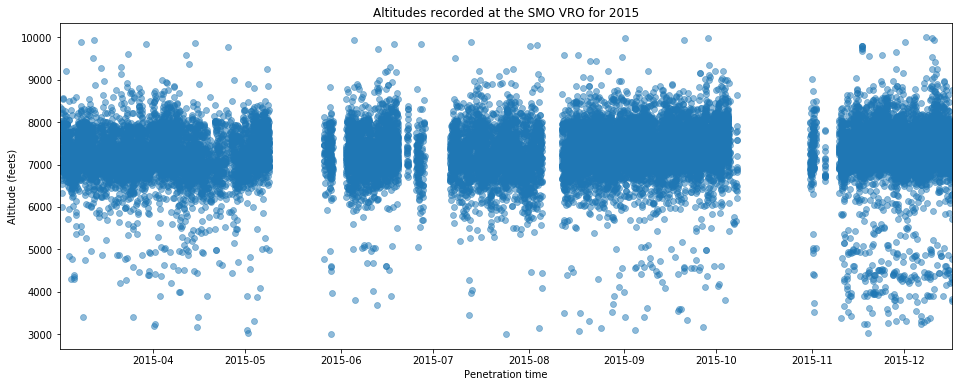

In [24]:
import seaborn as sns
import pandas as pd  #import pandas
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

df = pd.read_csv('SMO-VOR-2015.csv')
df.head()

df.ptime = pd.to_datetime(df.ptime)

ax = sns.scatterplot(x='ptime', y='alt', alpha = 0.5, edgecolor=None, data=df)
ax.set(xlabel='Penetration time', ylabel='Altitude (feets)', title='Altitudes recorded at the SMO VRO for 2015')
ax.set(xlim=(df.ptime.min(), df.ptime.max()))


# 🤔 Exercise 4: 

In a new Colab notebook load `SMO-VOR-2015` and use `Seaborn` to create a boxplot of  the altitudes over time.

You will need to look at the help:

```
?sns.boxplot
```

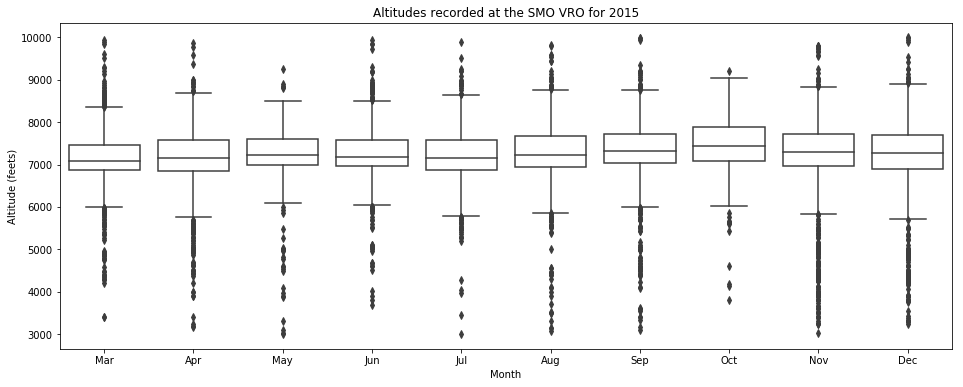

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x='month', y='alt', data=df)

ax.set(xlabel='Month', ylabel='Altitude (feets)', title='Altitudes recorded at the SMO VRO for 2015')

for box in ax.artists:
    box.set_facecolor('w')

# 🤔 Exercise 5: 

In a new Colab notebook load `SMO-VOR-2015` and use `Seaborn` to create an histogram of  the altitudes over time.

You will need to look at the help:

```
?sns.distplot
```

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Altitude (feets)'),
 Text(0.5, 1.0, 'Altitudes recorded at the SMO VRO for 2015')]

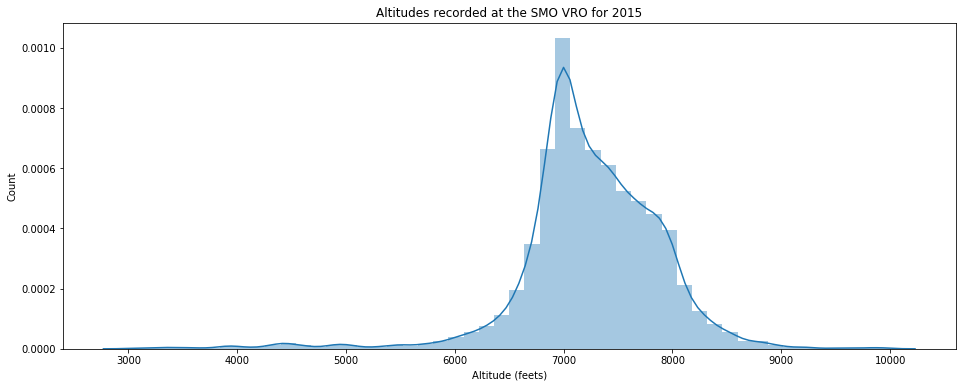

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
ax = sns.distplot(df.alt);
#ax = sns.distplot(df.alt, kde=False, rug=True);
ax.set(xlabel='Altitude (feets)', ylabel='Count', title='Altitudes recorded at the SMO VRO for 2015')